In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [97]:
#Read the files and create Dataframe 
city_file = os.path.join("raw_data","city_data.csv")
ride_file = os.path.join("raw_data","ride_data.csv")
city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

#When looked at the file, there was one duplicate entry.
city_df = city_df.drop_duplicates("city", keep = "first")

#Merge the two dataframes on CITY.
merged_df = city_df.merge(ride_df, on = "city")

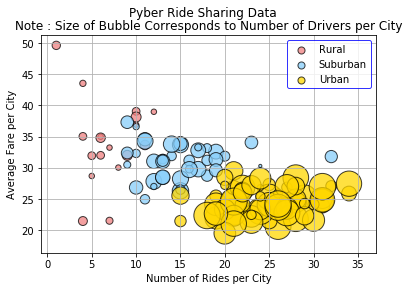

In [99]:
#Group by city
by_city = merged_df.groupby("city")

#Average Fare per city
avg_fare = by_city["fare"].mean()

#Total number of rides per city
total_rides = by_city["ride_id"].count()

#Total number of drivers
total_drivers = by_city["driver_count"].mean()

#City type
city_type = city_df.set_index("city")["type"]

cityInfo = pd.DataFrame({"Average Fare":avg_fare,
                         "Number of Rides":total_rides,
                         "Number of Drivers":total_drivers,
                         "Type of city":city_type})

rural = cityInfo[cityInfo["Type of city"] == "Rural"]
suburban = cityInfo[cityInfo["Type of city"] == "Suburban"]
urban = cityInfo[cityInfo["Type of city"] == "Urban"]

colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
CityColors = {'Urban': colors['Gold'], 'Suburban': colors['Light Sky Blue'], 'Rural': colors['Light Coral']}

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, 
            color = CityColors['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, 
            color = CityColors['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, 
            color = CityColors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

plt.suptitle('Pyber Ride Sharing Data')
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

legend = plt.legend(frameon = True, edgecolor = 'Blue')
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

plt.grid()
plt.show()